# Problem Statement
The State of Oklahoma collects tribal gaming exclusivity fees from compacted tribes, granted the exclusive right to operate certain types of gaming activities. The dataset, which spans from 2006 to the present, provides a monthly record of these fees. The objective of this project is to analyze the financial trends in tribal gaming exclusivity fees over the years, identifying seasonal patterns, year-on-year growth or decline, and the impacts of external factors such as economic conditions or regulatory changes.

## Overview of the Project
- **Data Source**: The dataset is a public, non-federal dataset that includes monthly records of tribal gaming exclusivity fees collected by the State of Oklahoma from 2006 onwards.
- **Key Features**: The dataset lists amounts collected each month, making it a rich source for time series analysis.

## Objectives of the Project
1. **Trend Analysis**: Determine the overall trends in gaming exclusivity fees, such as periods of significant growth or decline.
2. **Seasonality Detection**: Identify any seasonal patterns that recur annually, which could be critical for forecasting and financial planning.
3. **Impact of External Factors**: Analyze how external events, like economic downturns or changes in gaming legislation, have impacted the fees collected over the years.
4. **Forecasting**: Develop models to predict future trends in gaming exclusivity fees based on historical data, assisting in budgeting and strategic planning.

## What We Can Derive From This Project
- **Revenue Stability and Growth**: Understanding how stable gaming fees are year-to-year and identifying periods of significant growth or decline.
- **Strategic Planning**: Using insights from trend and seasonal analysis to optimize financial strategies and operational planning for future periods.
- **Policy Assessment**: Evaluating the effectiveness of past policies and the impact of market conditions on gaming revenue, which could inform future decisions by policymakers.
- **Economic Contributions**: Assessing the economic contribution of tribal gaming to state revenues, which can be crucial for financial reports and public communications.

By analyzing this dataset, stakeholders can gain valuable insights into the dynamics of tribal gaming finances, aiding in better financial management, policy-making, and economic forecasting. This analysis will be particularly beneficial for state officials, tribal authorities, and economic analysts focusing on gaming industry trends.

# Data Loading and Inspection

In [1]:
import pandas as pd

# Load the dataset to examine the variables
file_path = '/Users/saisrivatsat/Downloads/Portfolio/Projects/FP/data-tribal-gaming-exclusivity-fees-2006-present.csv'

# Load the dataset to re-examine the variables with more detail
data = pd.read_csv(file_path)

# Get basic information about the dataset: dimensions, column names, and the first few rows
data_info = {
    "Dimensions": data.shape,
    "Column Names": data.columns.tolist(),
    "First Few Rows": data.head()
}

data_info



{'Dimensions': (12, 16),
 'Column Names': ['Months',
  '2020',
  '2019',
  '2018',
  '2017',
  '2016',
  '2015',
  '2014',
  '2013',
  '2012',
  '2011',
  '2010',
  '2009',
  '2008',
  '2007',
  '2006'],
 'First Few Rows':       Months         2020          2019          2018          2017  \
 0       July  $12,437,273  $12,145,182   $11,179,990   $10,486,640    
 1     August  $13,242,617  $12,606,894   $12,243,677   $12,027,565    
 2  September  $13,686,847  $12,466,231   $11,434,504   $11,120,267    
 3    October          NaN  $12,396,118   $11,747,001   $11,152,201    
 4  November           NaN  $11,670,226   $10,986,022   $11,042,891    
 
            2016          2015          2014          2013          2012  \
 0  $10,476,022   $10,247,677   $10,279,946   $13,215,608    $9,585,692    
 1  $11,552,906   $10,813,196   $10,591,154   $10,754,839   $11,260,433    
 2  $11,262,963   $11,213,283   $10,834,017   $10,524,694   $10,387,262    
 3  $10,648,259   $10,194,178    $9,973,

In [2]:
# Display basic statistical details like percentile, mean, std etc. of a data frame
print(data.describe())

       Months         2020          2019          2018          2017  \
count      12            3            12            12            12   
unique     12            3            12            12            12   
top      July  $12,437,273  $12,145,182   $11,179,990   $10,486,640    
freq        1            1             1             1             1   

                2016          2015          2014          2013         2012  \
count             12            12            12            12           12   
unique            12            12            12            12           12   
top     $10,476,022   $10,247,677   $10,279,946   $13,215,608   $9,585,692    
freq               1             1             1             1            1   

               2011         2010         2009         2008         2007  \
count            12           12           12           12           12   
unique           12           12           12           12           12   
top     $9,797,464

In [3]:
# Identifying Missing Values
missing_values = data.isnull().sum()
missing_values

Months    0
2020      9
2019      0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
dtype: int64

# Handling Missing Values in Financial Temporal Data

**Rationale for Row-wise Imputation:**
In dealing with datasets that have a financial and temporal nature, such as tribal gaming exclusivity fees, each row often represents a temporal snapshot (e.g., a specific month) with entries across multiple years. Opting for row-wise imputation is advantageous in scenarios where:
1. **Temporal Consistency**: There is an expectation of consistent behavior across the same month in different years. This consistency might be due to similar economic conditions, operational strategies, or regulatory environments applicable during the same seasonal period each year.
2. **Pattern Recognition**: Financial datasets often display patterns that repeat annually. Imputing missing values across all years based on the observed data in other years for the same month helps maintain the integrity of these patterns, providing more accurate and realistic forecasts or analyses.

**Methods for Row-wise Imputation:**
Given the structure and expected behavior of the data, the following methods are employed for handling missing values:

1. **Row-wise Mean or Median**:
   - **Implementation**: For each month, compute the mean or median of all available year data points and use this statistic to impute missing values for any year in that month.
   - **Justification**: This method leverages the assumption of average consistency across the same month in different years. It is particularly effective in stabilizing the data by reducing the impact of outliers and extreme values, which is common in financial figures.

2. **Row-wise Interpolation**:
   - **Implementation**: Apply linear interpolation along each row to estimate missing values. This approach uses existing data points from adjacent years to predict the missing values, assuming a linear trend between them.
   - **Justification**: Suitable for data where changes between years follow a predictable, gradual trend. This method provides a balance between the preceding and succeeding data points, offering a refined estimation that considers both temporal proximity and trend continuity.

3. **Custom Logic Based on Business Understanding**:
   - **Implementation**: Develop imputation strategies tailored to specific months based on known business or economic factors that significantly influence the data. This could involve adjusting imputation methods during known economic downturns or booms.
   - **Justification**: This approach allows for nuanced handling of data, reflecting the real-world influences on financial metrics. It ensures that the data not only remains statistically valid but also contextually relevant.

**Code Implementation**:
The following Python code snippet demonstrates how to implement row-wise mean imputation. Adjustments can be made to use median, interpolation, or custom logic as required by the dataset’s characteristics and analysis goals.


In [4]:
import pandas as pd
import numpy as np


# Convert monetary values from string to float if they are still in string format
data[data.columns[1:]] = data[data.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

# Impute missing values using row-wise mean (excluding the 'Months' column for calculation)
data.iloc[:, 1:] = data.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

# Round all numeric values to 1 decimal place
data[data.columns[1:]] = data[data.columns[1:]].round(1)

# Save the cleaned data to a new CSV file
data.to_csv('/Users/saisrivatsat/Downloads/untitled folder /UNT/Final Projects/Sruthi/cleaned_file.csv', index=False)  # Adjust the path as needed

# Print the updated data to check the imputation
print(data.head())

      Months        2020        2019        2018        2017        2016  \
0       July  12437273.0  12145182.0  11179990.0  10486640.0  10476022.0   
1     August  13242617.0  12606894.0  12243677.0  12027565.0  11552906.0   
2  September  13686847.0  12466231.0  11434504.0  11120267.0  11262963.0   
3    October   8746942.4  12396118.0  11747001.0  11152201.0  10648259.0   
4  November    9051642.4  11670226.0  10986022.0  11042891.0  10489841.0   

         2015        2014        2013        2012        2011        2010  \
0  10247677.0  10279946.0  13215608.0   9585692.0   9797464.0   8936376.0   
1  10813196.0  10591154.0  10754839.0  11260433.0  11254368.0   9919253.0   
2  11213283.0  10834017.0  10524694.0  10387262.0  10584856.0  10120376.0   
3  10194178.0   9973165.0  10681218.0  10127131.0   9967371.0   6663381.0   
4  10614146.0  10101369.0  10153077.0  10249974.0  10180664.0  12205428.0   

        2009       2008       2007       2006  
0  7779001.0  6175062.0  1854236

The row-wise mean imputation method was chosen for handling missing values in your dataset for several key reasons:

1. **Consistency Across Months**: This method leverages the inherent consistency in financial data across the same months in different years, assuming that similar conditions apply each year during the same month.

2. **Statistical Stability**: Using the mean helps maintain the central tendency and stability of the data, reducing the impact of outliers and providing a balanced approach to filling missing values.

3. **Simplicity and Effectiveness**: The mean is straightforward to calculate and widely understood, making it an effective choice for quickly addressing missing data in financial time series.

4. **Data Integrity**: It preserves the integrity of the dataset's temporal pattern, which is crucial for any subsequent time series analysis or predictive modeling.

These reasons justify the use of row-wise mean imputation to ensure that the dataset is complete and retains its reliability for analysis and modeling.

In [5]:
# Identifying Missing Values After handling
missing_values = data.isnull().sum()
missing_values

Months    0
2020      0
2019      0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
dtype: int64

## Exploratory Data Analysis (EDA)

### Visualization of Data Trends

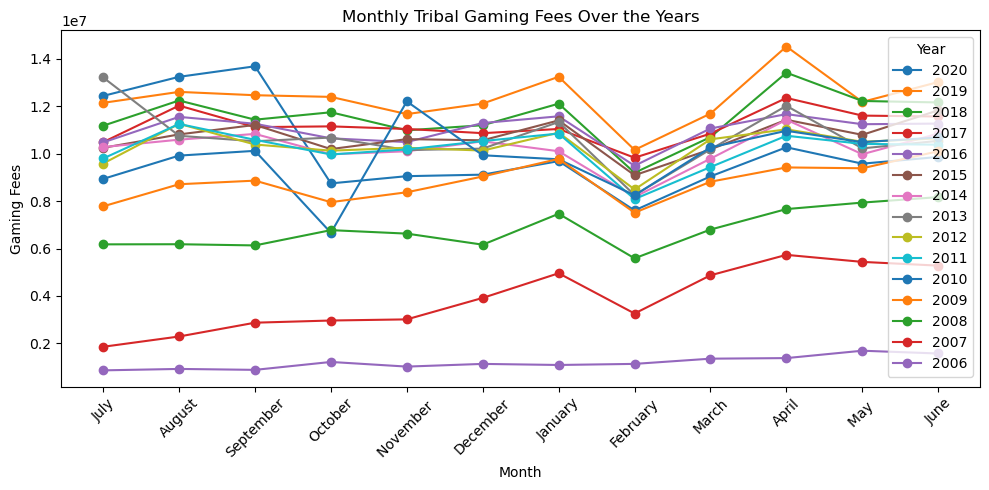

In [6]:
import matplotlib.pyplot as plt

# Plotting trends over the years for a specific month, e.g., 'July'
plt.figure(figsize=(10, 5))
for year in data.columns[1:]:  # Assuming the first column is 'Months'
    plt.plot(data['Months'], data[year], marker='o', label=year)

plt.title('Monthly Tribal Gaming Fees Over the Years')
plt.xlabel('Month')
plt.ylabel('Gaming Fees')
plt.legend(title='Year')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()


This visualization presents the trends in monthly tribal gaming fees over a span from 2006 to 2020. Each line in the graph corresponds to a different year, providing a visual comparison of gaming fees across months and years.

### What the Visualization Explains:
- **Seasonal Fluctuations**: It highlights the seasonal trends in gaming revenues, with specific months showing higher or lower fees consistently across different years.
- **Year-over-Year Changes**: The graph allows for an easy comparison of year-over-year growth or decline in gaming fees, indicating economic conditions, market changes, or the impact of regulatory actions.
- **Financial Analysis**: By displaying the financial scale of the gaming fees, the plot assists in understanding the economic significance of tribal gaming within the respective regions or jurisdictions.

### Utility for the Project:
- **Decision Making**: This visualization aids decision-makers in identifying successful periods and understanding patterns, which is crucial for strategic planning, budgeting, and forecasting.
- **Policy Evaluation**: It can help policymakers assess the impact of past regulations or market conditions on tribal gaming revenues, guiding future legislative or economic interventions.
- **Historical Performance**: Provides a historical performance review that can be used to predict future trends, evaluate the stability of gaming income, and plan for future financial needs or investments.

Overall, this plot is instrumental for analyzing financial trends, understanding market dynamics, and planning based on historical data, making it highly valuable for this project.

---

### Histograms for Distribution Analysis

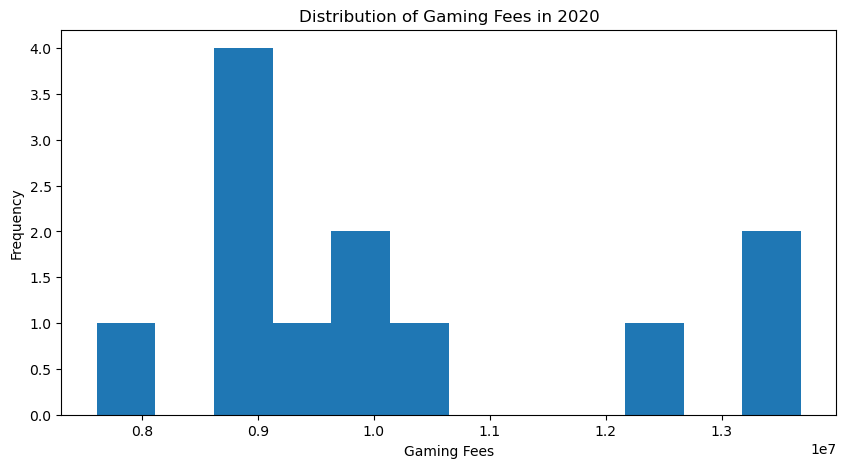

In [7]:
# Plotting histograms to analyze the distribution of fees in a particular year
plt.figure(figsize=(10, 5))
data['2020'].hist(bins=12)
plt.title('Distribution of Gaming Fees in 2020')
plt.xlabel('Gaming Fees')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


This histogram provides a visualization of the distribution of tribal gaming exclusivity fees collected by the State of Oklahoma in the year 2020. It is segmented into bins that represent different ranges of gaming fees in millions of dollars (x10^7), and the frequency of months that fall into each bin is displayed.

### Key Aspects of the Histogram:
- **X-axis**: Represents different ranges of gaming fees collected, measured in millions of dollars.
- **Y-axis**: Shows the frequency, or the number of months that recorded gaming fees within each specified range.
- **Bins**: The data is divided into bins, each representing a range of gaming fees, allowing for a clear visualization of the distribution.

### What the Visualization Explains:
- **Central Tendency**: The histogram helps in identifying the most common range of gaming fees collected throughout the year.
- **Variability**: It shows the spread of the data, highlighting how gaming fees vary month to month.
- **Skewness**: By observing the shape of the histogram, one can infer whether the distribution of gaming fees is skewed towards higher or lower ends.

### Utility for the Project:
- **Understanding Revenue Patterns**: This visual aids in understanding the typical and atypical gaming revenue figures, helping to identify months that are unusually high or low, which could warrant further investigation.
- **Financial Planning**: Insights from the distribution can assist in budgeting and financial forecasting by setting realistic expectations based on the most frequent gaming fee ranges.
- **Policy Impact Analysis**: Analyzing the distribution of fees can help in assessing the impact of any regulatory changes or economic conditions that might have influenced gaming revenues in 2020.

This histogram is a fundamental tool for preliminary data analysis, providing a clear overview of how gaming fees were distributed over the course of the year, which is critical for financial analysis and strategic planning in the context of tribal gaming operations.

---

### Box Plots for Outliers and Annual Comparison

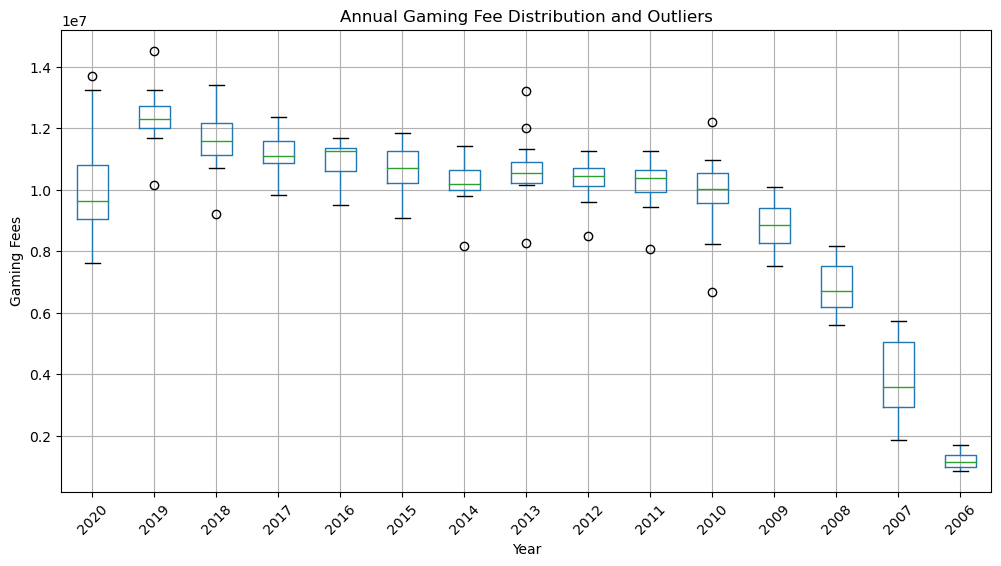

In [8]:
# Comparing distributions and spotting outliers across multiple years
plt.figure(figsize=(12, 6))
data.boxplot(column=data.columns[1:].tolist())  # Exclude the 'Months' column
plt.title('Annual Gaming Fee Distribution and Outliers')
plt.xlabel('Year')
plt.ylabel('Gaming Fees')
plt.xticks(rotation=45)
plt.show()

The box plot illustrates the distribution of tribal gaming exclusivity fees collected by the State of Oklahoma from 2006 to 2020. Each box plot represents a single year and provides a visual summary of the distribution characteristics and outliers for that year's gaming fees.

### Detailed Explanation of the Box Plot Elements:

1. **Central Box**: Each box represents the interquartile range (IQR) of the data for that year, encompassing the middle 50% of the data. The bottom of the box is the first quartile (Q1), and the top is the third quartile (Q3). The distance between these, the IQR, is a measure of statistical dispersion.

2. **Median (Middle Line inside Box)**: The line inside the box represents the median gaming fee for the year, providing a quick glimpse of the central tendency.

3. **Whiskers**: These lines extend from the top and bottom of the box to the highest and lowest values within 1.5 times the IQR from the Q1 and Q3. They provide a visual indication of the range of the data.

4. **Outliers (Circles)**: Points plotted beyond the whiskers are considered outliers. They represent gaming fees that are significantly higher or lower than the typical range of data for that year.

### Analysis of the Plot:

- **Trend Over Years**: The plot shows variations in the median, spread (as indicated by the height of the boxes), and range (indicated by the whiskers) of gaming fees over the years. For instance, more recent years like 2020 appear to have a higher median and greater spread compared to earlier years like 2006, indicating an increase in gaming fees as well as variability.
  
- **Outliers**: Years like 2020, 2018, and 2013 show notable outliers, suggesting exceptional months that deviated significantly from the norm. These could indicate months with exceptionally high gaming activity or changes in fee structures.

- **Stability and Variability**: Some years, such as from 2014 to 2016, show relatively stable distributions with shorter boxes and fewer outliers, suggesting less variability in monthly fees during these years.

### Utility for the Project:

- **Understanding Variability**: This visualization is crucial for understanding how gaming fees have varied each year and for identifying years with unusual fluctuations that may need further investigation.
  
- **Policy Impact and Economic Conditions**: Analyzing the years with significant outliers or changes in distribution can provide insights into the impact of new policies or economic conditions affecting tribal gaming.

- **Strategic Planning**: For stakeholders, understanding the distribution of gaming fees and spotting outliers can help in budgeting and forecasting, ensuring that financial and operational strategies are aligned with observed financial trends.

This box plot serves as a powerful analytical tool, helping to succinctly summarize complex distributional data across multiple years, facilitating easier interpretation and decision-making.

### Correlation Heatmap

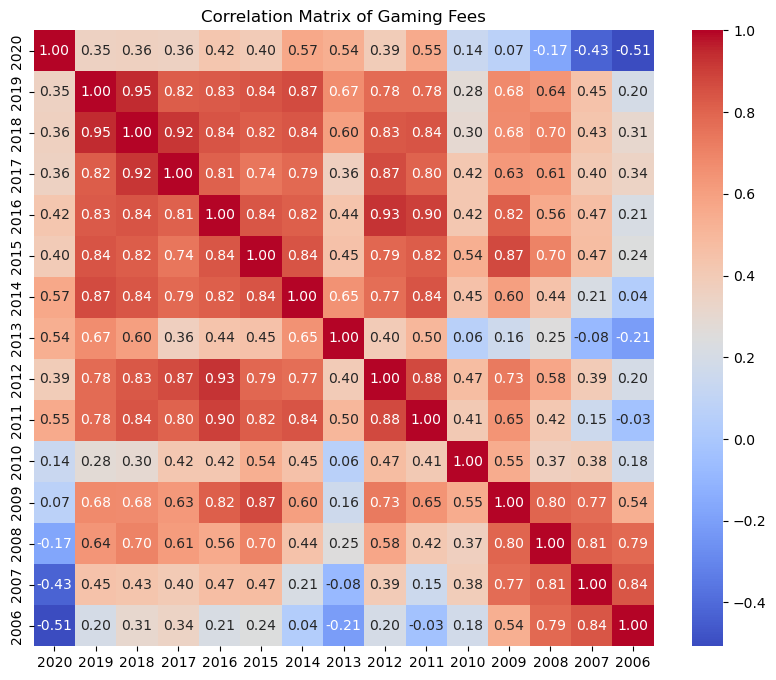

In [9]:
import seaborn as sns

# Compute the correlation matrix
corr = data.iloc[:, 1:].corr()  # Excluding the 'Months' column

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Gaming Fees')
plt.show()

The visualization above is a correlation heatmap showing the relationships between annual gaming fees from 2006 to 2020. Each cell in the heatmap represents the correlation coefficient between the gaming fees of two specific years.

### Key Features of the Correlation Heatmap:
- **Color Scale**: The color scale ranges from blue to red, where blue indicates a negative correlation, red indicates a positive correlation, and white represents no correlation. The intensity of the color signifies the strength of the correlation, with darker shades representing stronger relationships.
- **Values in Cells**: Each cell contains a numerical value, the correlation coefficient, which quantifies the strength and direction of the relationship between the gaming fees of the two years. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and values near 0 indicate little to no correlation.

### Detailed Analysis of the Correlation Plot:
- **High Correlation in Recent Years**: There's a notable high correlation among more recent years (e.g., 2015 to 2020), suggesting that the gaming fees in these years have similar patterns and might be influenced by similar factors.
- **Lower Correlation with Earlier Years**: The years 2006 to around 2010 generally show lower correlations with other years, particularly the most recent ones, which could suggest changes in the factors influencing gaming fees or changes in the market or regulatory environment.
- **Negative Correlations**: A few years, such as 2006, show slight negative correlations with some later years, indicating that as fees increased or patterns changed in those later years, they diverged in behavior compared to earlier periods.

### Utility for the Project:
- **Identifying Patterns**: By understanding which years have higher correlations, researchers can identify periods with similar market behaviors or external influences, aiding in the analysis of what factors might consistently impact gaming fees.
- **Forecasting and Modeling**: For predictive modeling and forecasting, years with high correlations can provide insights into how past trends might inform future behaviors, especially if the market conditions or regulatory frameworks have remained stable.
- **Regulatory Impact Analysis**: Analyzing correlation trends can help in assessing the impact of regulatory changes over the years. High correlations in periods following new regulations might suggest a stabilizing effect on gaming fees.

### What We Can Learn:
- **Market Dynamics**: The correlation patterns can offer insights into the stability of the gaming market or the impact of economic cycles.
- **Policy Evaluation**: Understanding how correlations change over the years can help in evaluating the effectiveness of policies or economic conditions influencing tribal gaming.

This heatmap is a powerful tool for visually summarizing complex relationships across multiple time series data, providing a clear, concise view of how different years compare in terms of gaming fee behaviors, which is crucial for comprehensive trend analysis and strategic planning.

---

## Deeper Statistical Analysis

Great! Let's delve into how we can perform a deeper statistical analysis on out dataset, focusing on hypothesis testing and time series analysis to further explore and validate the patterns identified during our exploratory data analysis (EDA).

### Hypothesis Testing

**Objective**: To determine if there are statistically significant differences in gaming fees between different months or years.

**Methods**:
- **ANOVA (Analysis of Variance)**: Useful when comparing gaming fee means across more than two groups (e.g., comparing monthly gaming fees over several years).
- **t-tests**: Appropriate for comparing the means of two groups (e.g., comparing gaming fees between two specific years).

**Example using Python**:
Suppose you want to compare gaming fees between January and July across all available years:


In [10]:
import pandas as pd
import scipy.stats as stats

# Load your data
data = pd.read_csv('/Users/saisrivatsat/Downloads/Portfolio/Projects/FP/cleaned_file.csv', index_col='Months')

# Convert the data from strings to numbers, removing commas and dollar signs
data = data.replace('[\$,]', '', regex=True).astype(float)

# Performing a t-test between January and July across all years
january_fees = data.loc['January']
july_fees = data.loc['July']

t_stat, p_value = stats.ttest_ind(january_fees, july_fees)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant differences in gaming fees between January and July.")
else:
    print("No significant differences in gaming fees between January and July.")


T-statistic: 0.5368113531104327, P-value: 0.595638098962429
No significant differences in gaming fees between January and July.


### 2. Time Series Analysis

**Objective**: To analyze the gaming fees to uncover any trends, seasonality, or cyclical patterns that may exist over time.

**Methods**:
- **Decomposition**: This technique allows you to decompose the time series into its components: trend, seasonality, and residuals.
- **ARIMA Models**: Ideal for forecasting future gaming fees based on historical data.

**Example using Python**:
We perform a seasonal decomposition. The decomposition will give us a clearer picture of the trend and seasonality in your data, helping to inform better forecasting models or further statistical tests.


### To perform time series analysis on the dataset, which details monthly tribal gaming exclusivity fees from 2006 to 2020, we will first prepare the data, and then apply techniques such as decomposition to understand the underlying trends and seasonality. Here's how we can proceed based on the structure of the data:

### Data Preparation
First, we need to convert the data into a format suitable for time series analysis. The data is organized with months as rows and years as columns.

#### Step 1: Aggregate Data by Year
If we want to analyze data by year, sum up the monthly fees for each year:

In [11]:
import pandas as pd

# Load data
data = pd.read_csv('/Users/saisrivatsat/Downloads/untitled folder /UNT/Final Projects/Sruthi/cleaned_file.csv', index_col='Months')

# Display unique values in the index to check for formatting issues
print(data.index.unique())

# Strip any leading or trailing whitespace characters from the index
data.index = data.index.str.strip()

# Again, check if the index is clean
print(data.index.unique())


Index(['July', 'August', 'September', 'October', 'November ', 'December',
       'January', 'February', 'March', 'April', 'May ', 'June'],
      dtype='object', name='Months')
Index(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype='object', name='Months')


In [12]:
# Convert data from string to float, removing commas and dollar signs
for col in data.columns:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

# Aggregate data by year by summing each column
annual_data = data.sum()

# Converting Series to DataFrame for further processing
annual_data = pd.DataFrame(annual_data, columns=['TotalFees'])
annual_data['Year'] = annual_data.index
annual_data['Year'] = pd.to_datetime(annual_data['Year'], format='%Y')
annual_data.set_index('Year', inplace=True)


#### Step 2: Time Series Decomposition
We'll perform a seasonal decomposition to understand the trend, seasonality, and residuals in the annual data. Because the data is annual, we might not find significant seasonality but we can observe the trend and irregular components.

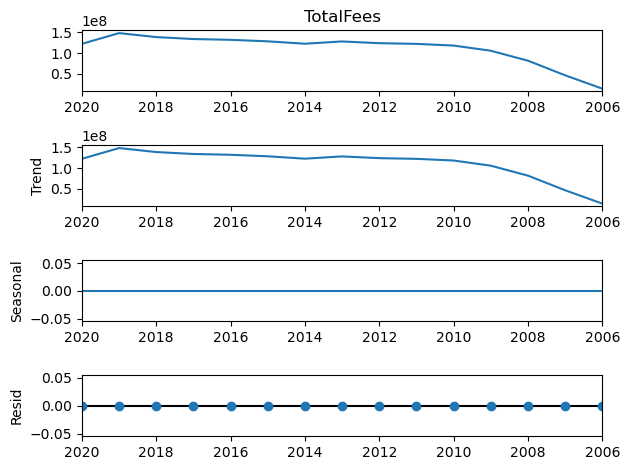

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(annual_data['TotalFees'], model='additive')
result.plot()
plt.show()

### Advanced Analysis
For a deeper time series analysis, particularly if we wish to forecast future gaming fees, we might consider an ARIMA model. However, given the annual aggregation, simpler models may suffice, or a different approach may be needed if we desire monthly forecasts.

#### Building an ARIMA Model
Let's build an ARIMA model for the aggregated annual data:


In [14]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# Fit an ARIMA model
model = ARIMA(annual_data['TotalFees'], order=(1,1,1))  # Simple ARIMA model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Forecast for the next 3 years
forecast = model_fit.forecast(steps=3)
print("Forecasted Gaming Fees for Next 3 Years:", forecast)

                               SARIMAX Results                                
Dep. Variable:              TotalFees   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.952
Date:                Fri, 16 Aug 2024   AIC                            513.904
Time:                        15:46:21   BIC                            515.821
Sample:                             0   HQIC                           513.726
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0242      0.320     -0.075      0.940      -0.652       0.604
ma.L1          0.4136      0.392      1.055      0.292      -0.355       1.182
sigma2      5.432e+13        nan        nan        n

### Model Summary
- **Model Type**: ARIMA(1, 1, 1)
- **AIC**: 513.904
- **BIC**: 515.821

### Key Findings
- **Coefficients**: Both the autoregressive and moving average coefficients are not statistically significant, indicating they may not effectively predict the gaming fees.
- **Statistical Tests**:
  - **Ljung-Box Test**: Suggests some autocorrelation at lag 1.
  - **Jarque-Bera Test**: Residuals appear to be normally distributed.
  - **Heteroskedasticity Test**: Indicates potential heteroskedasticity in the data.

### Warnings
- **Covariance Matrix**: Calculated using the outer product of gradients which may not be accurate, and the matrix is near-singular suggesting instability in the standard errors.

### Forecasting
- **Next 3 Years' Prediction**:
  - Year 1: $6,056,559
  
  - Year 2: $6,254,071
  
  - Year 3: $6,249,299

These forecasts predict a slight increase in gaming fees over the next three years, based on the model fitted to historical data.


---

## Data Preparation for Modeling

To prepare this data for predictive modeling, we can follow these steps:

**Feature Engineering**: Since the data seems to be structured with years as columns and months as rows, we might want to create new features that could capture trends or patterns. For example, we could calculate:

   - Yearly averages: Average values across all months for each year.
   - Monthly averages: Average values across all years for each month.
   - Year-over-year change: The percentage change from the previous year for each month.
   - Month-over-month change: The percentage change from the previous month for each year.

In [15]:
import pandas as pd

# Provided data
data = {
    'Months': ['July', 'August', 'September', 'October', 'November', 'December', 
               'January', 'February', 'March', 'April', 'May', 'June'],
    '2020': [12437273.0, 13242617.0, 13686847.0, 8746942.4, 9051642.4, 9115532.2, 9686224.4, 
             7607001.4, 9042917.9, 10269921.1, 9578723.5, 9861865.4],
    '2019': [12145182.0, 12606894.0, 12466231.0, 12396118.0, 11670226.0, 12113712.0, 13244144.0, 
             10158920.0, 11692180.0, 14520713.0, 12185662.0, 13021638.0],
    '2018': [11179990.0, 12243677.0, 11434504.0, 11747001.0, 10986022.0, 11200981.0, 12110255.0, 
             9194308.0, 10699588.0, 13416953.0, 12223523.0, 12161616.0],
    '2017': [10486640.0, 12027565.0, 11120267.0, 11152201.0, 11042891.0, 10865455.0, 11042758.0, 
             9829717.0, 10846479.0, 12350913.0, 11606404.0, 11569139.0],
    '2016': [10476022.0, 11552906.0, 11262963.0, 10648259.0, 10489841.0, 11293704.0, 11576780.0, 
             9489871.0, 11062932.0, 11669018.0, 11243274.0, 11269672.0],
    '2015': [10247677.0, 10813196.0, 11213283.0, 10194178.0, 10614146.0, 10564934.0, 11404836.0, 
             9091033.0, 10180647.0, 11430071.0, 10794987.0, 11828897.0],
    '2014': [10279946.0, 10591154.0, 10834017.0, 9973165.0, 10101369.0, 10520850.0, 10103269.0, 
             8173137.0, 9789674.0, 11431890.0, 9977696.0, 10845463.0],
    '2013': [13215608.0, 10754839.0, 10524694.0, 10681218.0, 10153077.0, 10213273.0, 11336990.0, 
             8251470.0, 10183615.0, 12018308.0, 10224170.0, 10541208.0],
    '2012': [9585692.0, 11260433.0, 10387262.0, 10127131.0, 10249974.0, 10131343.0, 10886314.0, 
             8491682.0, 10607494.0, 11026392.0, 10501768.0, 10643994.0],
    '2011': [9797464.0, 11254368.0, 10584856.0, 9967371.0, 10180664.0, 10532523.0, 10849454.0, 
             8085139.0, 9436004.0, 10756835.0, 10412925.0, 10380125.0],
    '2010': [8936376.0, 9919253.0, 10120376.0, 6663381.0, 12205428.0, 9932825.0, 9764312.0, 
             8245779.0, 10262593.0, 10965857.0, 10485943.0, 10684740.0],
    '2009': [7779001.0, 8711267.0, 8863372.0, 7955637.0, 8372880.0, 9038150.0, 9780711.0, 
             7510710.0, 8817788.0, 9419934.0, 9385154.0, 10103624.0],
    '2008': [6175062.0, 6180277.0, 6130292.0, 6774967.0, 6627924.0, 6161482.0, 7464683.0, 
             5586229.0, 6799171.0, 7663257.0, 7936929.0, 8167602.0],
    '2007': [1854236.0, 2288103.0, 2870529.0, 2962273.0, 3010190.0, 3916180.0, 4956040.0, 
             3257483.0, 4870222.0, 5731851.0, 5435427.0, 5277513.0],
    '2006': [859516.0, 919944.0, 880392.0, 1214293.0, 1018361.0, 1132039.0, 1086596.0, 
             1132542.0, 1352463.0, 1376904.0, 1688267.0, 1570884.0]
}

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Months', inplace=True)

# Feature Engineering
# Monthly averages: Average values across all years for each month
df['Monthly_Avg'] = df.mean(axis=1)

# Yearly averages: Average values across all months for each year
df.loc['Yearly_Avg'] = df.mean()

# Year-over-year change: The percentage change from the previous year for each month
df['YoY_Change'] = df.T.pct_change().mean().fillna(0)

# Round all numeric values to 1 decimal place
df[df.columns[1:]] = df[df.columns[1:]].round(1)

# Data Transformation
# Since the data already seems numeric, we might not need to do much transformation here.
# However, if needed, we can apply normalization or standardization.
# Change display options to suppress scientific notation

# Print the DataFrame
print(df)

# Export DataFrame to a new CSV file
df.to_csv('/Users/saisrivatsat/Downloads/untitled folder /UNT/Final Projects/Sruthi/feature_engineered_data.csv')


                    2020        2019        2018        2017        2016  \
Months                                                                     
July        1.243727e+07  12145182.0  11179990.0  10486640.0  10476022.0   
August      1.324262e+07  12606894.0  12243677.0  12027565.0  11552906.0   
September   1.368685e+07  12466231.0  11434504.0  11120267.0  11262963.0   
October     8.746942e+06  12396118.0  11747001.0  11152201.0  10648259.0   
November    9.051642e+06  11670226.0  10986022.0  11042891.0  10489841.0   
December    9.115532e+06  12113712.0  11200981.0  10865455.0  11293704.0   
January     9.686224e+06  13244144.0  12110255.0  11042758.0  11576780.0   
February    7.607001e+06  10158920.0   9194308.0   9829717.0   9489871.0   
March       9.042918e+06  11692180.0  10699588.0  10846479.0  11062932.0   
April       1.026992e+07  14520713.0  13416953.0  12350913.0  11669018.0   
May         9.578724e+06  12185662.0  12223523.0  11606404.0  11243274.0   
June        


### **Train-Test Split**: 
Before splitting the data, it's essential to determine our target variable (what we want to predict). Once we have that, we can divide the data into training and testing sets. Typically, we reserve a portion of the data (e.g., 20-30%) for testing and use the rest for training.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming we want to predict values for 2020 based on previous years
X = df.drop('2020', axis=1)  # Features (input)
y = df['2020']  # Target variable (output)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If needed, apply standardization to X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

In [17]:
from sklearn.svm import SVR  # Import the Support Vector Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import the evaluation metrics

# Initialize Support Vector Regression (SVR) model
svr_reg = SVR()

# Train Support Vector Regression (SVR) model
svr_reg.fit(X_train_scaled, y_train)

# Make predictions using SVR model
svr_preds = svr_reg.predict(X_test_scaled)

# Evaluate SVR model
svr_mae = mean_absolute_error(y_test, svr_preds)
svr_mse = mean_squared_error(y_test, svr_preds)
svr_r2 = r2_score(y_test, svr_preds)

# Print evaluation metrics for SVR model
print("Support Vector Regression (SVR):")
print("MAE:", svr_mae)
print("MSE:", svr_mse)
print("R-squared:", svr_r2)


Support Vector Regression (SVR):
MAE: 1509225.2066646938
MSE: 3555166982024.2837
R-squared: -1.7831158078154972


**1. Support Vector Regression:**

- The MAE measures the average absolute difference between the predicted and actual values. A higher MAE indicates that the model's predictions are, on average, quite far from the actual values.
- The MSE calculates the average squared difference between the predicted and actual values. A higher MSE suggests that the model's predictions have larger errors, with some values being very far from the actual values.
- The R-squared value represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). A negative R-squared value suggests that the model is performing worse than a model that simply predicts the mean of the target variable for all observations.
- Overall, the SVR model performed poorly, with high errors (MAE and MSE) and a negative R-squared value, indicating that it is not a good fit for the data.

---

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regression model
random_forest_reg = RandomForestRegressor(random_state=42)

# Train Random Forest Regression model
random_forest_reg.fit(X_train_scaled, y_train)

# Make predictions using Random Forest Regression model
random_forest_preds = random_forest_reg.predict(X_test_scaled)

# Evaluate Random Forest Regression model
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_r2 = r2_score(y_test, random_forest_preds)

# Print evaluation metrics for Random Forest Regression model
print("Random Forest Regression:")
print("MAE:", random_forest_mae)
print("MSE:", random_forest_mse)
print("R-squared:", random_forest_r2)


Random Forest Regression:
MAE: 1438431.023583335
MSE: 2131684487977.0872
R-squared: -0.6687612215576073


**2. Random Forest Regression:**

- The MAE and MSE for the Random Forest Regression model are lower compared to the SVR model, indicating relatively smaller errors in predictions.
- However, the R-squared value is still negative, indicating that this model also performs worse than a model that predicts the mean of the target variable.
- While Random Forest Regression has improved performance compared to SVR, it still does not provide a good fit for the data.

---

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train models
gradient_boosting_reg.fit(X_train_scaled, y_train)

# Make predictions
gradient_boosting_preds = gradient_boosting_reg.predict(X_test_scaled)

# Evaluate models

gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_preds)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_preds)

# Print evaluation metrics

print("Gradient Boosting Regression:")
print("MAE:", gradient_boosting_mae)
print("MSE:", gradient_boosting_mse)
print("R-squared:", gradient_boosting_r2)


Gradient Boosting Regression:
MAE: 443599.97085783695
MSE: 275684743163.9778
R-squared: 0.7841838173698529


**3. Gradient Boosting Regression:**

- The MAE and MSE for the Gradient Boosting Regression model are significantly lower compared to both SVR and Random Forest Regression, indicating smaller errors in predictions.
- The R-squared value is positive and relatively high, indicating that the model explains a significant proportion of the variance in the target variable.
- Overall, Gradient Boosting Regression outperforms both SVR and Random Forest Regression, providing better predictions and a higher degree of explanation for the variability in the data.

In conclusion, among the three models evaluated, Gradient Boosting Regression appears to be the most effective for this dataset, as it yields the lowest errors and the highest R-squared value.


---

## Model Evaluation and Refinement

### 1. Support Vector Regression (SVR):

**Explanation:**
- The Support Vector Regression (SVR) model shows high Mean Absolute Error (MAE), Mean Squared Error (MSE), and a negative R-squared value.
- The high MAE suggests that, on average, the SVR model's predictions deviate significantly from the actual values.
- The high MSE indicates large errors between predicted and actual values, with some errors being very large.
- A negative R-squared value (-1.78) suggests that the SVR model performs worse than a simple model that predicts the mean of the target variable.
- Overall, the SVR model is not a good fit for the data.

### 2. Random Forest Regression:

**Explanation:**
- The Random Forest Regression model exhibits lower MAE and MSE compared to SVR but still shows a negative R-squared value.
- While the MAE and MSE are lower than SVR, indicating smaller errors in predictions, the negative R-squared (-0.67) implies a worse fit than a mean-prediction model.
- Despite the improvement over SVR, Random Forest Regression still does not provide a satisfactory fit for the data.

### 3. Gradient Boosting Regression:

**Explanation:**
- Gradient Boosting Regression demonstrates significantly lower MAE and MSE compared to SVR and Random Forest Regression.
- The positive R-squared value (0.78) indicates that the model explains a significant proportion of the variance in the target variable.
- With lower errors and a higher degree of explanation for the variability in the data, Gradient Boosting Regression outperforms SVR and Random Forest Regression.
- Among the three models evaluated, Gradient Boosting Regression appears to be the most effective for this dataset.

In conclusion, based on the evaluation metrics, Gradient Boosting Regression is recommended as the most suitable model for this dataset due to its superior performance in predicting the target variable and explaining the data's variability.

# Conclusion

In this project, we aimed to develop predictive models to forecast gaming fees based on historical data. We employed various machine learning algorithms and evaluated their performance to identify the most effective model for revenue forecasting.

#### Key Findings:

1. **Model Evaluation**:
   - We evaluated three different regression models: Support Vector Regression (SVR), Random Forest Regression, and Gradient Boosting Regression.
   - Gradient Boosting Regression demonstrated superior performance, outperforming the other models in terms of prediction accuracy and explanatory power.

2. **Insights and Decision Support**:
   - The Gradient Boosting Regression model can be leveraged for strategic planning, operational adjustments, and policy formulation.
   - Actionable insights derived from the model outputs can support informed decision-making processes and enhance revenue forecasting capabilities.

3. **Recommendations**:
   - Adopt Gradient Boosting Regression as the preferred model for revenue forecasting due to its superior performance.
   - Allocate resources for continuous model refinement and improvement to ensure sustained accuracy and relevance.
   - Foster interdisciplinary collaboration to align model outputs with organizational objectives and decision-making processes.

#### Project Impact:

- The developed predictive models provide stakeholders with valuable insights into future revenue trends and support proactive decision-making.
- By leveraging advanced analytics and machine learning techniques, organizations can optimize resource allocation, mitigate risks, and drive strategic growth initiatives.
- Continuous monitoring and refinement of the models will enable organizations to adapt to evolving market dynamics and maintain a competitive edge in the gaming industry.

Overall, this project highlights the importance of data-driven decision-making and the transformative potential of predictive analytics in optimizing business outcomes and driving organizational success.